In [1]:
import modules.IEEE_data_extractor as ieee_data_extractor
import modules.Shu_data_extractor as shu_data_extractor
from modules.Experiment import Experiment as exp
from modules.properties import IEEE_properties as props
from modules.Results import Results_Processor as rp

import numpy as np
import os
import pickle
import matplotlib.pyplot as plt

c:\Users\ofera\anaconda3\envs\rehab\lib\site-packages\mne_features\mock_numba.py:12: UserWarning: Numba needs NumPy 1.22 or less. Your code will be slower.
  warn('{}. Your code will be slower.'.format(err))


here
PyTorch is not using the GPU.


In [2]:
IEEE_super = rp(f_name='task_iters_timestr_20230309-154106.pickle')
IEEE_super.filter_sub(min_acc=0.55)
removed_subs = IEEE_super.removed_subs
print(IEEE_super.n_iters)
IEEE_super.process_result()
IEEE_super.plot_result(title="IEEE dataset - supervised")

AttributeError: 'Results_Processor' object has no attribute 'filter_sub'

!!!!!!!!!!!!!!!!C:\Users\ofera\studies\NAWD\results\task_iters_timestr_20230314-164800.pickle
            Total number of subjects:  19
            Number of subjects with accuracy higer than 0.6:   4
            Number of subjects with accuracy less than 0.6 (removed):   15
5


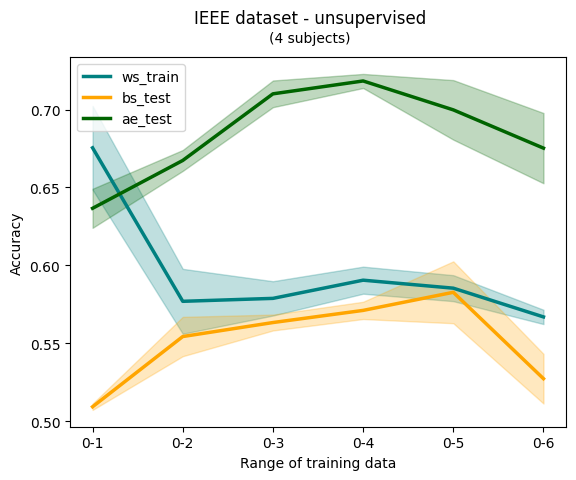

In [ ]:
IEEE_unsuper = rp(f_name='task_iters_timestr_20230314-164800.pickle')
IEEE_unsuper.filter_sub(min_acc=0.6)
print(IEEE_unsuper.n_iters)
IEEE_unsuper.process_result()
IEEE_unsuper.plot_result(title="IEEE dataset - unsupervised")

!!!!!!!!!!!!!!!!C:\Users\ofera\studies\NAWD\results\task_iters_timestr_20230330-162826.pickle
            Total number of subjects:  25
            Number of subjects with accuracy higer than 0.6:   5
            Number of subjects with accuracy less than 0.6 (removed):   20
Num of iterations: 19


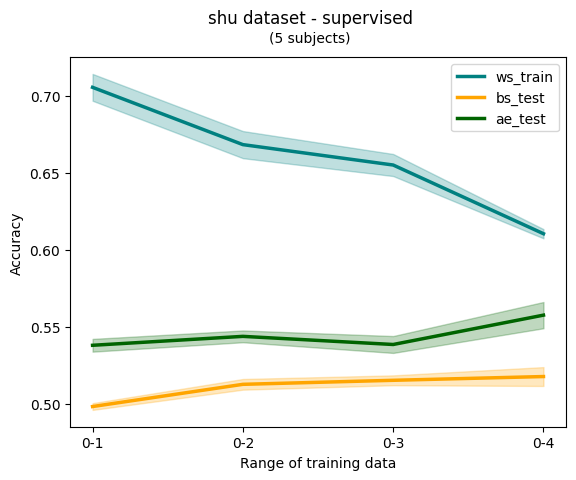

In [ ]:
shu_supervised = rp(f_name='task_iters_timestr_20230330-162826.pickle')
shu_supervised.filter_sub(min_acc=0.6)
print(f'Num of iterations: {shu_supervised.n_iters}')
shu_supervised.process_result()
shu_supervised.plot_result(title="shu dataset - supervised")

!!!!!!!!!!!!!!!!C:\Users\ofera\studies\NAWD\results\task_iters_timestr_20230402-123741.pickle
            Total number of subjects:  25
            Number of subjects with accuracy higer than 0.6:   7
            Number of subjects with accuracy less than 0.6 (removed):   18
Num of iterations: 44


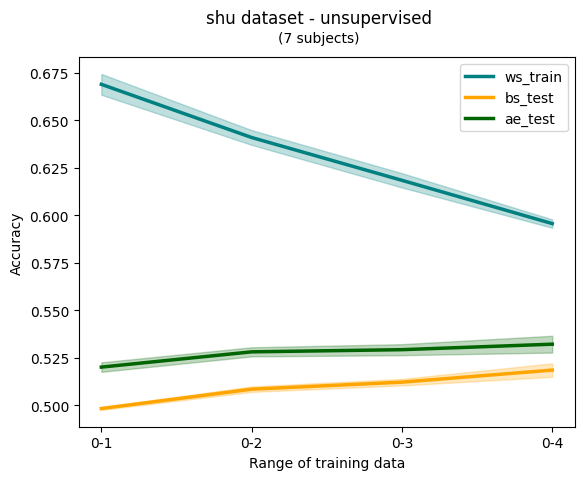

In [ ]:
shu_unsupervised = rp(f_name='task_iters_timestr_20230402-123741.pickle')
shu_unsupervised.filter_sub(min_acc=0.6)
print(f'Num of iterations: {shu_unsupervised.n_iters}')
shu_unsupervised.process_result()
shu_unsupervised.plot_result(title="shu dataset - unsupervised")

In [ ]:
IEEE_super = rp(f_name='origin_iters_timestr_20230309-154106.pickle')
IEEE_super.filter_out_sub_from_list(removed_subs)
print(IEEE_super.n_iters)
IEEE_super.process_result()
IEEE_super.plot_result(title="IEEE dataset - supervised (session clasification)")

!!!!!!!!!!!!!!!!C:\Users\ofera\studies\NAWD\results\origin_iters_timestr_20230309-154106.pickle


AttributeError: 'Results_Processor' object has no attribute 'filter_out_sub_from_list'

!!!!!!!!!!!!!!!!C:\Users\ofera\studies\NAWD\results\origin_iters_timestr_20230314-164800.pickle
5


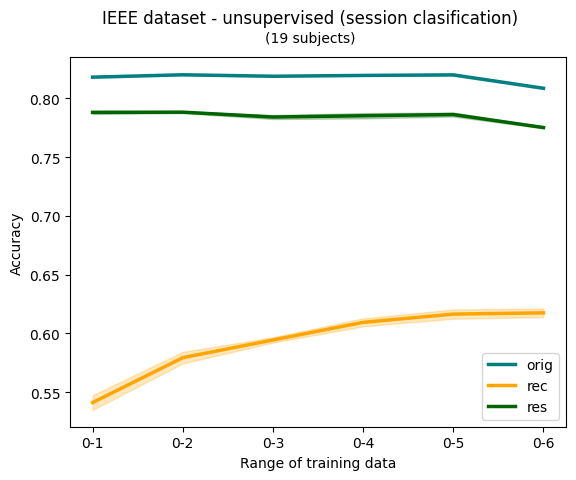

In [49]:
IEEE_unsuper = rp(f_name='origin_iters_timestr_20230314-164800.pickle')
# IEEE_unsuper.filter_sub(min_acc=0.55)
print(IEEE_unsuper.n_iters)
IEEE_unsuper.process_result()
IEEE_unsuper.plot_result(title="IEEE dataset - unsupervised (session clasification)")

In [39]:
results_data_dir = 'C:/Users/ofera/studies/NAWD/results_dir'
ws_list_all = []
bs_list_all = []
ae_list_all = []
ws_train_all = []
ae_train_all = []
# load all pickle files
for file in os.listdir(results_data_dir):
    if file.endswith(".pickle"):
        if '20230416-142435' in file:
            with open(results_data_dir + '/' + file, "rb") as f:
                load_obj = pickle.load(f)
                ws_list_all.append(load_obj[0])
                bs_list_all.append(load_obj[1])
                ae_list_all.append(load_obj[2])
                ws_train_all.append(load_obj[3])
                ae_train_all.append(load_obj[4])
        if 'per_day_score' in file:
            with open(results_data_dir + '/' + file, "rb") as f:
                per_day_score = pickle.load(f)


#  Flatten the lists
ws_means = np.mean(np.asarray([j for i in ws_list_all for j in i]), axis=0)
bs_means = np.mean(np.asarray([j for i in bs_list_all for j in i]), axis=0)
ae_means = np.mean(np.asarray([j for i in ae_list_all for j in i]), axis=0)
ws_train_means = np.mean(np.asarray([j for i in ws_train_all for j in i]), axis=0)
ae_train_means = np.mean(np.asarray([j for i in ae_train_all for j in i]), axis=0)

In [40]:
np.asarray([j for i in ws_train_all for j in i]).shape

(12, 100)

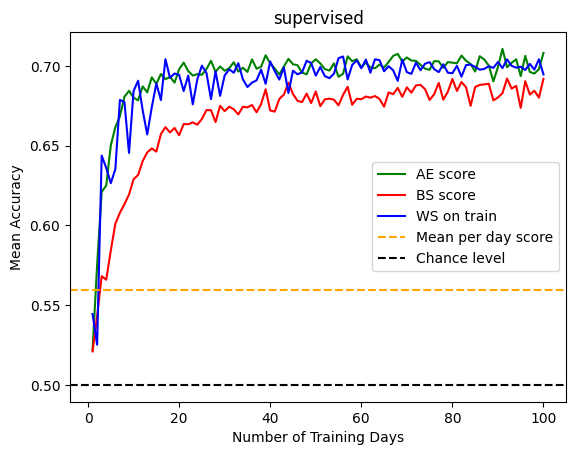

In [42]:
x_ax = range(1,1+len(ws_means))
# Plots Results
plt.plot(x_ax, ae_means, label='AE score', color='g')
plt.plot(x_ax, bs_means, label='BS score', color='r')
# plt.plot(x_ax, ws_means, label='WS on test', color='teal')
plt.plot(x_ax, ws_train_means, label='WS on train', color='b')
plt.axhline(np.mean(per_day_score), label='Mean per day score', color='orange', linestyle='--')
plt.axhline(0.5, label='Chance level', color='k', linestyle='--')
# Figure stuff
plt.title('supervised')
plt.xlabel('Number of Training Days')
plt.ylabel('Mean Accuracy')
plt.legend()
plt.show()

In [43]:
results_data_dir = 'C:/Users/ofera/studies/NAWD/results_dir'
ws_list_all = []
bs_list_all = []
ae_list_all = []
ws_train_all = []
ae_train_all = []
# load all pickle files
for file in os.listdir(results_data_dir):
    if file.endswith(".pickle"):
        if '20230419-135456' in file:
            with open(results_data_dir + '/' + file, "rb") as f:
                load_obj = pickle.load(f)
                ws_list_all.append(load_obj[0])
                bs_list_all.append(load_obj[1])
                ae_list_all.append(load_obj[2])
                ws_train_all.append(load_obj[3])
                ae_train_all.append(load_obj[4])
        if 'per_day_score' in file:
            with open(results_data_dir + '/' + file, "rb") as f:
                per_day_score = pickle.load(f)


#  Flatten the lists
ws_means = np.mean(np.asarray([j for i in ws_list_all for j in i]), axis=0)
bs_means = np.mean(np.asarray([j for i in bs_list_all for j in i]), axis=0)
ae_means = np.mean(np.asarray([j for i in ae_list_all for j in i]), axis=0)
ws_train_means = np.mean(np.asarray([j for i in ws_train_all for j in i]), axis=0)
ae_train_means = np.mean(np.asarray([j for i in ae_train_all for j in i]), axis=0)

In [44]:
np.asarray([j for i in ws_train_all for j in i]).shape

(33, 100)

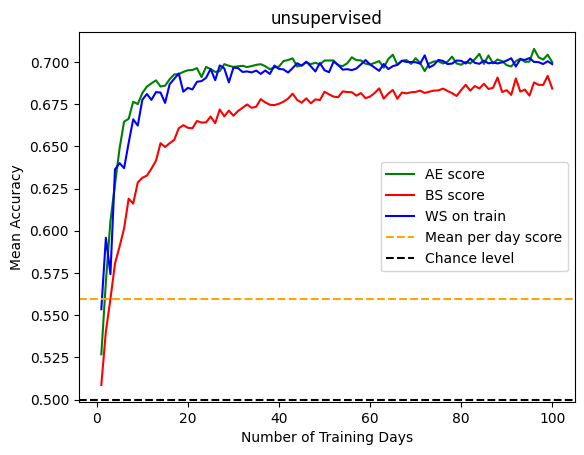

In [46]:
x_ax = range(1,1+len(ws_means))
# Plots Results
plt.plot(x_ax, ae_means, label='AE score', color='g')
plt.plot(x_ax, bs_means, label='BS score', color='r')
# plt.plot(x_ax, ws_means, label='WS on test', color='teal')
plt.plot(x_ax, ws_train_means, label='WS on train', color='b')
plt.axhline(np.mean(per_day_score), label='Mean per day score', color='orange', linestyle='--')
plt.axhline(0.5, label='Chance level', color='k', linestyle='--')
# Figure stuff
plt.title('unsupervised')
plt.xlabel('Number of Training Days')
plt.ylabel('Mean Accuracy')
plt.legend()
plt.show()